### Limpieza de datos

In [4]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


### Verificaciones

In [5]:
import pandas as pd
# Lee el archivo CSV especificando el delimitador y la columna de fechas
df = pd.read_csv('archivo_dividido.csv', delimiter=',', parse_dates=['Date'])

# Verifica que cada año avance coherentemente
def verificar_orden(dataframe):
    years = dataframe['Date'].dt.year.tolist()
    sorted_years = sorted(years)
    if years == sorted_years:
        print("Los años avanzan coherentemente en orden ascendente.")
    else:
        print("¡Error! Los años no avanzan coherentemente.")

verificar_orden(df)
df.head()

Los años avanzan coherentemente en orden ascendente.


,Date,January,February,March,April,May,June,July,August,September,October,November,December
0,1870-01-01,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871-01-01,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872-01-01,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873-01-01,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874-01-01,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


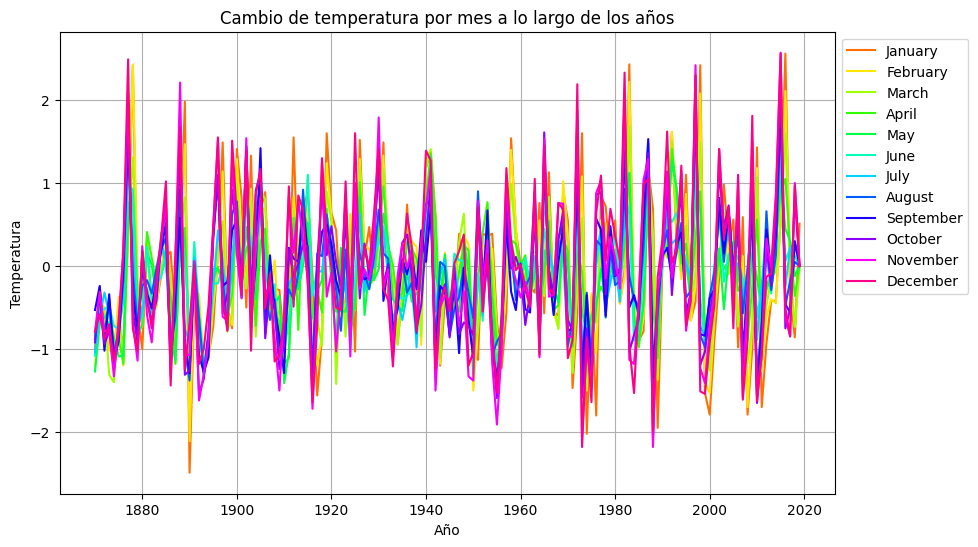

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una gráfica para mostrar el cambio de temperatura para cada mes a lo largo de todos los años
plt.figure(figsize=(10, 6))

# Conjunto para almacenar etiquetas únicas
used_labels = set()

# Definir una paleta de colores categóricos
palette = sns.color_palette("hsv", len(df.columns[1:]))

# Iterar sobre los meses y las columnas de temperatura
for month in range(1, 13):
    # Filtrar los datos para el mes actual
    month_data = df[df['Date'].dt.month == month]
    # Obtener la cantidad de datos para este mes
    num_data_points = month_data.shape[0]
    # Iterar sobre las columnas de temperatura y graficarlas si hay datos suficientes
    for i, col in enumerate(df.columns[1:]):
        # Verificar si la etiqueta ya se ha usado y si hay suficientes datos para graficar
        if col not in used_labels and num_data_points > 0:
            plt.plot(month_data['Date'], month_data[col], label=col, color=palette[i])
            used_labels.add(col)  # Agregar la etiqueta al conjunto de etiquetas usadas
    
# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.title('Cambio de temperatura por mes a lo largo de los años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [7]:
def takens_embedding(series, delay, dimension):
    """
    series: Serie temporal original
    delay: Retraso para el encaje
    dimension: Dimensión del encaje
    """
    embedded_series = np.array([series.shift(-i * delay) for i in range(0, dimension)]).T
    return pd.DataFrame(embedded_series, columns=[f'X(t-{i * delay})' for i in range(0, dimension)])



In [8]:
def persistence_model(train, test):
    """
    train: Conjunto de entrenamiento
    test: Conjunto de prueba
    """
    predictions = [train.iloc[-1]] * len(test)
    return predictions


In [13]:
# Obtener la serie de tiempo de todos los meses
for i in df.columns[1:]:
    datos = df[i]

# Aplicar el encaje de Takens
embedded_series = takens_embedding(datos, delay=1, dimension=3)


# Calcular la persistencia
train_size = int(len(january_data) * 0.66)
train, test = january_data[0:train_size], january_data[train_size:]
predictions = persistence_model(train, test)


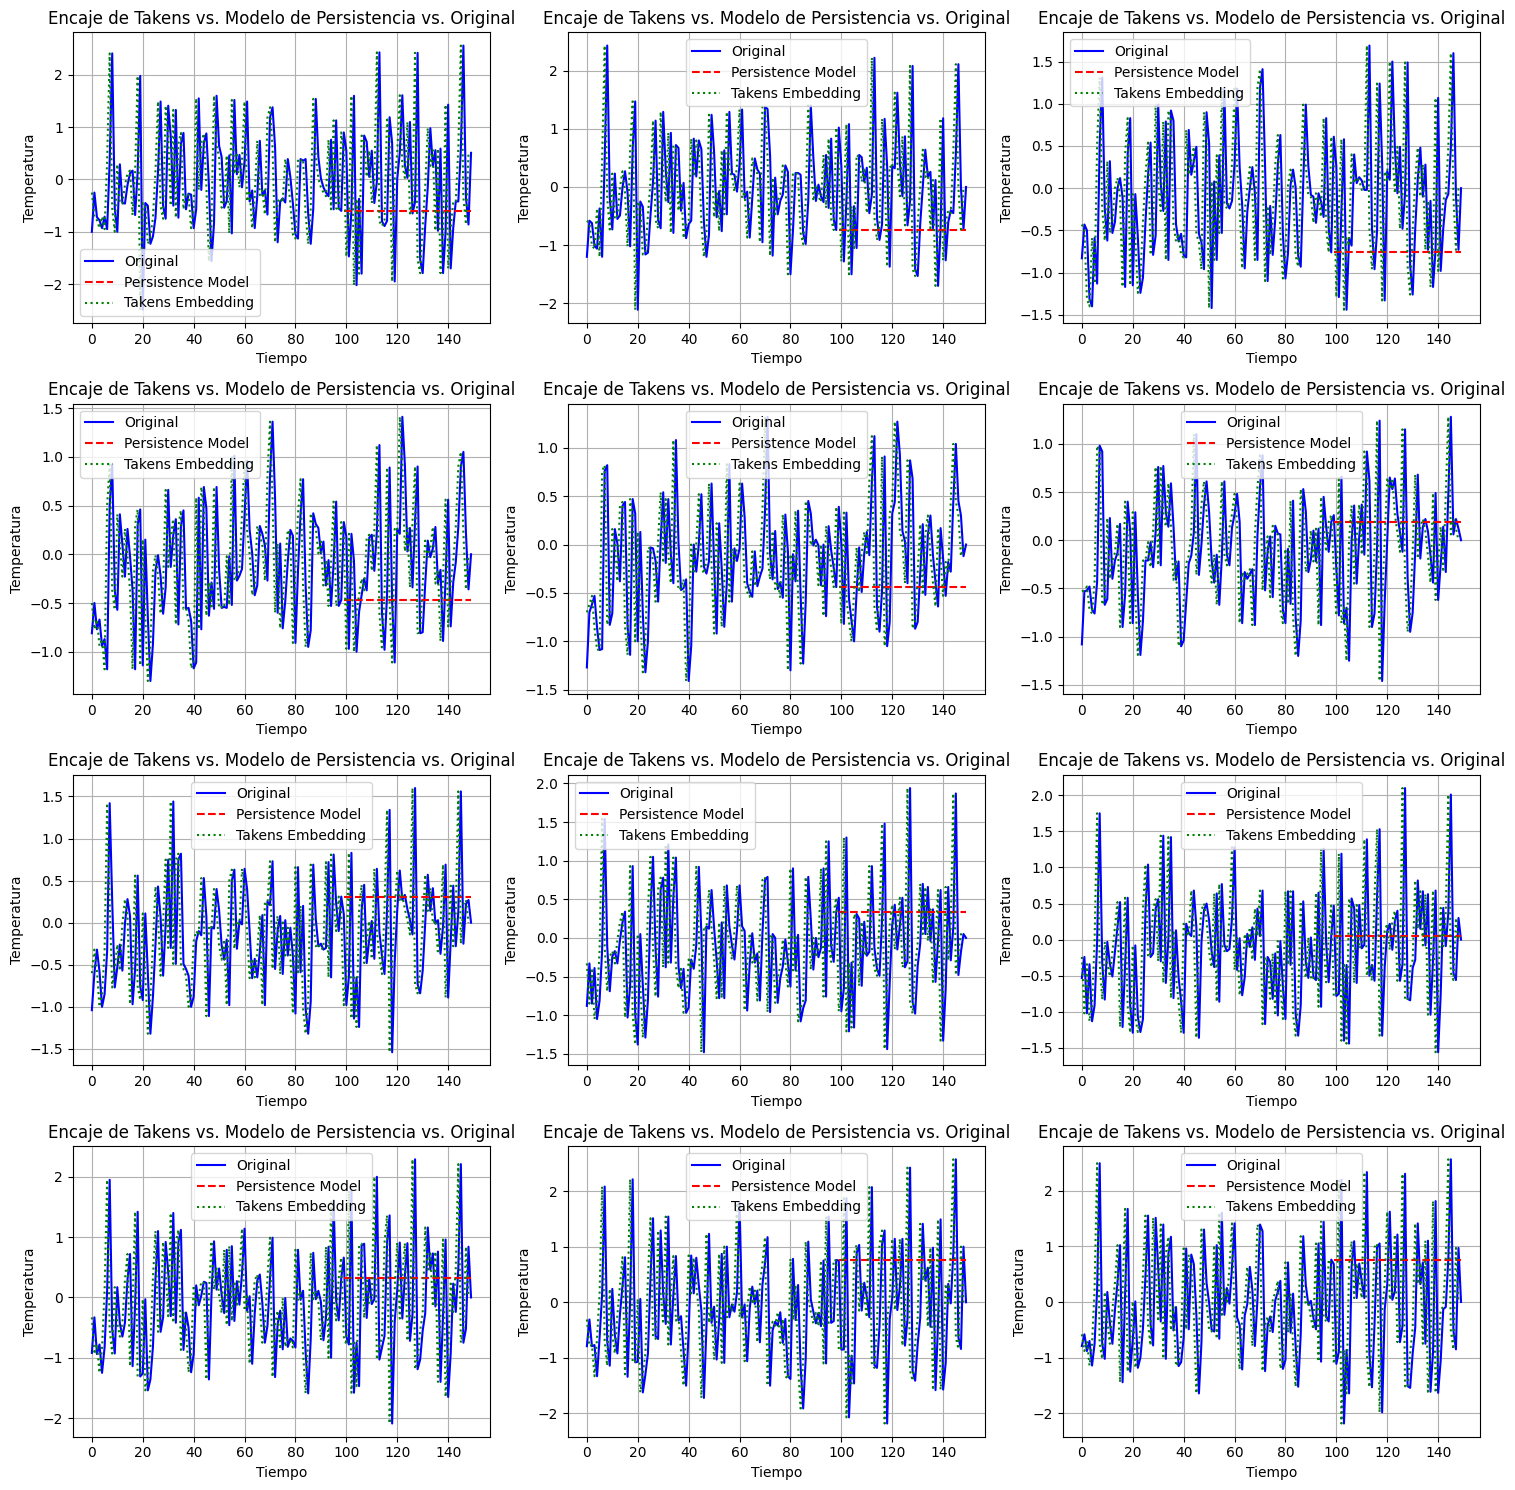

In [18]:
# Función para visualizar el encaje de Takens y el modelo de persistencia en un subplot
def plot_takens_vs_persistence_subplot(takens_data, persistence_data, original_data, ax):
    ax.plot(original_data.index, original_data, label='Original', color='blue')
    ax.plot(original_data.index[-len(persistence_data):], persistence_data, label='Persistence Model', color='red', linestyle='--')
    ax.plot(original_data.index[-len(takens_data):], takens_data, label='Takens Embedding', color='green', linestyle=':')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Temperatura')
    ax.set_title('Encaje de Takens vs. Modelo de Persistencia vs. Original')
    ax.legend()
    ax.grid(True)

# Obtener la serie de tiempo de todas las columnas excepto 'Date'
datos = df.drop(columns=['Date'])

# Determinar el número de filas y columnas para la cuadrícula de gráficas
nrows = 4  # Número de filas
ncols = 3  # Número de columnas

# Crear subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Aplanar los subgráficos para facilitar la iteración
axes = axes.flatten()

# Aplicar el encaje de Takens y el modelo de persistencia para cada columna y visualizar en subgráficos
for i, column in enumerate(datos.columns):
    takens_data = takens_embedding(datos[column], delay=1, dimension=3)['X(t-1)']
    train_size = int(len(datos[column]) * 0.66)
    train, test = datos[column][0:train_size], datos[column][train_size:]
    predictions = persistence_model(train, test)
    plot_takens_vs_persistence_subplot(takens_data, predictions, datos[column], axes[i])

# Ocultar los subgráficos que no se utilizarán
for j in range(nrows * ncols):
    if j >= len(datos.columns):
        axes[j].axis('off')

plt.tight_layout()
plt.show()
